In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import sklearn

In [53]:
data = pd.read_csv('health_data.csv')
data.head()

,age,restbps,chol,category
0,26,109,243,0
1,27,106,156,0
2,28,107,225,0
3,27,105,277,0
4,30,96,221,0


In [54]:
X = data.to_numpy()[:, :]
Y = data.to_numpy()[:, 3]
split = 0.8 #using 70:30 split, random each time
train_samples = np.random.choice(X.shape[0], int(split*X.shape[0]))
test_samples = np.array([i for i in range(X.shape[0]) if i not in list(train_samples)])

X_train = X[[train_samples]]
Y_train = Y[[train_samples]]

X_test = X[[test_samples]]
Y_test = Y[[test_samples]]

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  import sys
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  

In [55]:
print(X_test.shape[0])
print(X_train.shape[0])

307
560


In [56]:
no_of_classes = 2;

In [57]:
def euclidean_distance(X_1, X_2):
    distance_square = np.sum(np.square(X_1 - X_2), axis = 0, keepdims =True)
    
    return math.sqrt(distance_square)

In [58]:
# Locate the most similar k neighbors
def get_neighbors(X_train, X, k):
    distances = list()
    for X_i in X_train:
        dist = euclidean_distance(X, X_i)
        distances.append((X_i, dist))
    distances.sort(key=lambda tup: tup[1])
    k_neighbors = list()
    for i in range(k):
        k_neighbors.append(distances[i][0])
    return k_neighbors

In [59]:
def predict_classification(X_train, X, k):
    k_neighbors = get_neighbors(X_train, X, k)
    output_values = [row[-1] for row in k_neighbors]
    prediction = max(set(output_values), key=output_values.count)
    return prediction

In [60]:
def predict_regression(X_train, X, k):
    k_neighbors = get_neighbors(X_train, X, k)
    output_values = [row[-1] for row in k_neighbors]
    prediction = sum(output_values) / float(len(output_values))
    return prediction

In [61]:
#computing accuracy on test data.
C = np.zeros((2,2)) #[[]]
for i in range((X_test.shape[0])):
    y_pred = predict_classification(X_train, X_test[i], 4)
    C[y_pred, Y_test[i]] += 1

In [ ]:
C

In [ ]:
acc = (C[0,0] + C[1,1])/np.sum(C)
print(acc)

In [ ]:
neg_predictivity = (C[0,0])/(C[0,0] + C[0,1])
neg_predictivity

In [ ]:
precision = (C[1,1])/(C[1,0] + C[1,1])
precision

In [ ]:
Recall = (C[0,0])/(C[0,0] + C[1,0])
Recall

In [ ]:
Specificity = (C[1,1])/(C[0,1] + C[1,1])
Specificity

In [62]:
from tqdm import tqdm
Precision = []
Recall = []
ACC = []
F1_score = []
kk = range(1,300)
for k in tqdm(range(1,300)):
    C = np.zeros((2,2)) #[[]]
    for i in range((X_test.shape[0])):
        y_pred = predict_classification(X_train, X_test[i], k)
        C[y_pred, Y_test[i]] += 1
    acc = (C[0,0] + C[1,1])/np.sum(C) 
    pr = C[1,1]/(C[1,1] + C[1,0])
    rec = C[1,1]/(C[1,1] + C[0,1])
    f1 = 2*(pr*rec)/(pr + rec)
    Precision.append(pr)
    Recall.append(rec)
    F1_score.append(f1)
    ACC.append(acc)
#plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate'); plt.title('ROC curve');

100%|██████████| 299/299 [05:40<00:00,  1.14s/it]


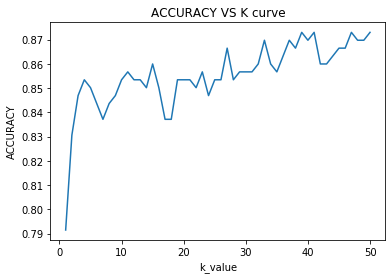

In [65]:
plt.plot(kk[:50], ACC[:50], '-')
plt.xlabel('k_value'); plt.ylabel('ACCURACY'); plt.title('ACCURACY VS K curve');

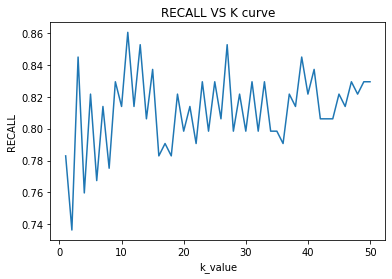

In [66]:
plt.plot(kk[:50], Recall[:50], '-')
plt.xlabel('k_value'); plt.ylabel('RECALL'); plt.title('RECALL VS K curve');

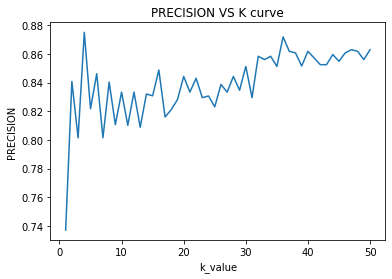

In [67]:
plt.plot(kk[:50], Precision[:50], '-')
plt.xlabel('k_value'); plt.ylabel('PRECISION'); plt.title('PRECISION VS K curve');

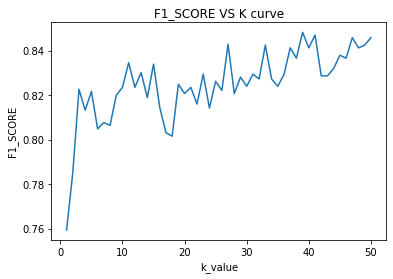

In [68]:
plt.plot(kk[:50], F1_score[:50], '-')
plt.xlabel('k_value'); plt.ylabel('F1_SCORE'); plt.title('F1_SCORE VS K curve');

## Question2

In [35]:
df = pd.read_excel('weather_data.xlsx')
df.head()

,dewptc,hum,wndspd,pressure,rain,smoke,temp
0,28,59,20,1008,0,0,20
1,48,61,10,1012,1,0,21
2,24,53,3,1001,0,0,16
3,17,54,8,1002,0,0,16
4,27,51,5,1007,0,0,14


In [36]:
X_2 = df.to_numpy()[:, :]
Y_2 = df.to_numpy()[:, 6]
split = 0.8 #using 70:30 split, random each time
train_samples = np.random.choice(X_2.shape[0], int(split*X_2.shape[0]))
test_samples = np.array([i for i in range(X_2.shape[0]) if i not in list(train_samples)])

X_train_2 = X_2[[train_samples]]

X_test_2 = X_2[[test_samples]]
Y_test_2 = Y_2[[test_samples]]

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  import sys
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  if __name__ == '__main__':
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error

In [37]:
y_predict = []
for i in range((X_test_2.shape[0])):
    y_pred = predict_regression(X_train_2, X_test_2[i], 4)
    y_predict.append(y_pred)

In [39]:
y_predict

[15.25,
 13.5,
 23.5,
 23.75,
 13.25,
 28.75,
 8.5,
 15.0,
 11.0,
 15.0,
 14.25,
 6.25,
 11.5,
 4.25,
 6.25,
 12.5,
 15.75,
 17.75,
 21.5,
 19.75,
 18.25,
 4.5,
 19.0,
 8.75,
 20.0,
 8.5,
 21.5,
 14.0,
 12.0,
 15.25,
 4.75,
 10.75,
 2.25,
 3.5,
 11.75,
 11.0,
 2.0,
 7.75,
 7.0,
 8.5,
 5.0,
 7.0,
 7.25,
 12.25,
 12.5,
 12.0,
 19.5,
 24.5,
 18.25,
 19.75,
 7.25,
 20.0,
 5.5,
 14.0,
 27.5,
 11.75,
 32.5,
 10.75,
 5.75,
 4.0,
 9.0,
 4.5,
 8.25,
 5.75,
 32.75,
 15.75,
 19.5,
 13.25,
 28.75,
 23.5,
 36.25,
 9.25,
 39.25,
 18.75,
 5.0,
 14.75,
 11.5,
 15.5,
 20.5,
 16.75,
 16.0,
 4.5,
 35.5,
 23.0,
 2.0,
 13.0,
 18.75,
 15.75,
 15.0,
 14.5,
 4.5,
 3.75,
 17.75,
 10.75,
 16.5,
 19.75,
 15.0,
 5.25,
 4.25,
 9.0,
 8.75,
 9.75,
 12.0,
 11.5,
 9.25,
 7.5,
 6.0,
 14.25,
 11.5,
 12.75,
 12.75,
 18.25,
 16.5,
 37.25,
 7.25,
 29.0,
 16.75,
 10.0,
 6.0,
 21.5,
 29.5,
 16.25,
 20.0,
 16.0,
 18.0,
 18.0,
 29.5,
 9.5,
 20.25,
 12.0,
 30.75,
 17.0,
 6.75,
 7.5,
 18.5,
 17.25,
 5.75,
 23.0,
 22.25,
 27.25,


In [43]:
error = Y_test_2 - y_predict

In [48]:
error =np.square(np.array(error))

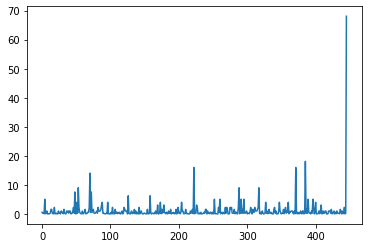

In [47]:
plt.plot(error)

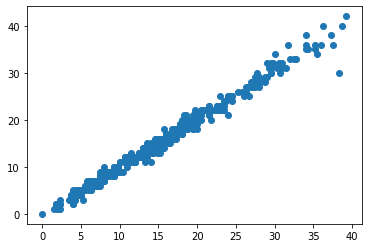

In [50]:
plt.scatter(y_predict, Y_test_2)